<a href="https://colab.research.google.com/github/SnekhaB/Customer_conversion_prediction/blob/main/Customer_conversion_prediction_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import statistics as st


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("/content/train (1).csv")
#pd.set_option('display.max_columns',None)


In [3]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [4]:
df.shape

(45211, 11)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [6]:
print(f'The Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

The Dataset contains 45211 rows and 11 columns.


In [7]:
for i in df:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "age" is divided into "77" categories.
Column "job" is divided into "12" categories.
Column "marital" is divided into "3" categories.
Column "education_qual" is divided into "4" categories.
Column "call_type" is divided into "3" categories.
Column "day" is divided into "31" categories.
Column "mon" is divided into "12" categories.
Column "dur" is divided into "1573" categories.
Column "num_calls" is divided into "48" categories.
Column "prev_outcome" is divided into "4" categories.
Column "y" is divided into "2" categories.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [9]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


1.mean and 50% is almost same

2.It looks like the data has extreme maximum values in age, duration, and number of calls, but we can't draw a conclusion from seeing this without doing the exploratory data analysis.

# **Data Cleaning**

**Checking and Handling Missing Values**

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [11]:
pd.DataFrame(df.isna().mean()*100)

,0
age,0.0
job,0.0
marital,0.0
education_qual,0.0
call_type,0.0
day,0.0
mon,0.0
dur,0.0
num_calls,0.0
prev_outcome,0.0


There are no null values in the dataset


**Drop the duplicate values**

In [12]:
df.drop_duplicates()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(45205, 11)

Six duplicates were found and removed.

**Data Type Correction**

In [15]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

All features are in the correct format.

**Check for Spelling mistake**

In [16]:
df['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [17]:
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [18]:
df['call_type'].value_counts()


cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [19]:
df['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [20]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [21]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [22]:
#from google.colab import drive
#drive.mount('/content/drive')

**Checking for outliers**

In [23]:
# Calculate the IQR
q1_age = np.percentile(df['age'], 25)
q3_age = np.percentile(df['age'], 75)
iqr_age = q3_age - q1_age

# Define the lower and upper bounds for potential outliers
lower_bound1 = q1_age - 1.5 * iqr_age
upper_bound1 = q3_age + 1.5 * iqr_age

# Identify potential outliers
outliers1 = [x for x in df['age'] if x < lower_bound1 or x > upper_bound1]

# Print the results
print("IQR:", iqr_age)
print("Lower Bound:", lower_bound1)
print("Upper Bound:", upper_bound1)
print("Potential Outliers:", outliers1)
len(outliers1)

IQR: 15.0
Lower Bound: 10.5
Upper Bound: 70.5
Potential Outliers: [83, 75, 75, 83, 75, 72, 71, 76, 83, 71, 85, 72, 90, 71, 82, 73, 74, 71, 75, 78, 85, 80, 71, 78, 73, 75, 94, 72, 83, 79, 78, 83, 73, 76, 83, 77, 73, 74, 73, 77, 71, 71, 80, 82, 75, 77, 78, 78, 86, 76, 72, 74, 77, 74, 79, 71, 74, 78, 73, 73, 95, 74, 71, 78, 71, 75, 75, 82, 74, 81, 76, 72, 75, 72, 71, 72, 77, 73, 85, 83, 78, 73, 79, 71, 71, 80, 72, 78, 79, 71, 82, 81, 79, 71, 79, 79, 73, 75, 72, 71, 75, 78, 75, 80, 80, 74, 73, 71, 72, 72, 77, 79, 73, 71, 80, 71, 83, 71, 73, 78, 72, 81, 81, 71, 74, 75, 82, 80, 76, 74, 74, 77, 71, 71, 77, 76, 72, 74, 74, 72, 73, 82, 77, 71, 79, 89, 76, 81, 74, 73, 71, 71, 77, 72, 84, 86, 72, 72, 76, 73, 74, 82, 71, 83, 72, 73, 73, 74, 72, 78, 86, 76, 79, 71, 81, 77, 82, 72, 73, 73, 74, 71, 73, 76, 71, 71, 83, 71, 80, 79, 77, 74, 84, 95, 77, 78, 79, 83, 83, 73, 77, 72, 74, 83, 76, 73, 81, 80, 75, 74, 75, 77, 83, 72, 81, 73, 74, 80, 72, 76, 72, 77, 74, 87, 76, 92, 78, 82, 78, 76, 73, 77, 76, 7

487

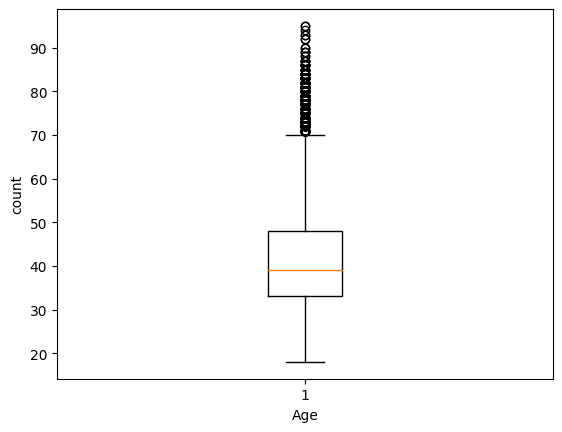

In [24]:
# Create a box plot
plt.boxplot(df['age'])

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('count')


# Show the plot
plt.show()

In [25]:
q1_dur = np.percentile(df['dur'], 25)
q3_dur = np.percentile(df['dur'], 75)
iqr_dur = q3_dur - q1_dur

# Define the lower and upper bounds for potential outliers
lower_bound_dur = q1_dur - 1.5 * iqr_dur
upper_bound_dur = q3_dur + 1.5 * iqr_dur

# Identify potential outliers
outliers_dur = [x for x in df['dur'] if x < lower_bound_dur or x > upper_bound_dur]

# Print the results
print("IQR:", iqr_dur)
print("Lower Bound:", lower_bound_dur)
print("Upper Bound:", upper_bound_dur)
print("Potential Outliers:", outliers_dur)
len(outliers_dur)

IQR: 216.0
Lower Bound: -221.0
Upper Bound: 643.0
Potential Outliers: [1666, 1492, 787, 1778, 812, 1042, 1467, 1389, 849, 677, 2033, 673, 1056, 717, 683, 1077, 1419, 730, 746, 702, 714, 962, 742, 669, 680, 808, 652, 1201, 1030, 769, 673, 744, 765, 1623, 678, 699, 1677, 918, 1297, 1906, 703, 802, 684, 739, 1597, 1529, 720, 852, 923, 953, 732, 1521, 800, 1138, 786, 799, 866, 1581, 650, 1101, 912, 690, 1062, 688, 2177, 764, 1273, 1574, 984, 1689, 697, 944, 1102, 943, 813, 1040, 1084, 923, 693, 690, 1119, 1120, 784, 665, 712, 1007, 667, 982, 756, 807, 2087, 650, 1120, 956, 985, 672, 1187, 826, 732, 847, 659, 772, 929, 710, 705, 2462, 825, 646, 653, 1028, 654, 1087, 1692, 2016, 1054, 1170, 665, 1713, 663, 1080, 1461, 750, 1178, 752, 878, 834, 1534, 836, 1002, 757, 1147, 820, 788, 832, 1495, 646, 744, 891, 1083, 1266, 793, 1727, 1875, 907, 723, 704, 1346, 1386, 3366, 1000, 2231, 705, 665, 1167, 806, 766, 1015, 683, 730, 768, 1001, 845, 853, 813, 916, 753, 708, 805, 901, 788, 851, 1052, 916, 

3235

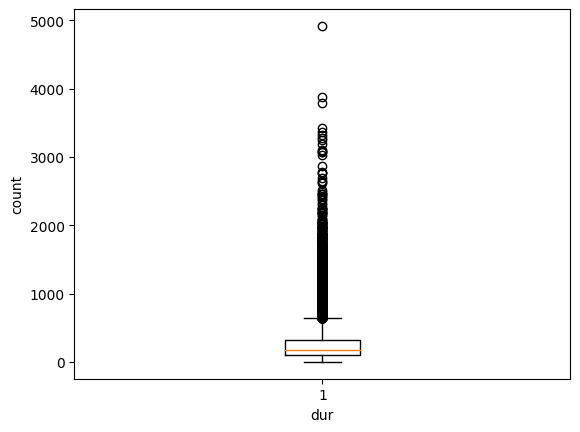

In [26]:
# Create a box plot
plt.boxplot(df['dur'])

# Adding labels and title
plt.xlabel('dur')
plt.ylabel('count')


# Show the plot
plt.show()

In [27]:
q1_call = np.percentile(df['num_calls'], 25)
q3_call = np.percentile(df['num_calls'], 75)
iqr_call = q3_call - q1_call

# Define the lower and upper bounds for potential outliers
lower_bound_call = q1_call - 1.5 * iqr_call
upper_bound_call = q3_call + 1.5 * iqr_call

# Identify potential outliers
outliers_call = [x for x in df['num_calls'] if x < lower_bound_call or x > upper_bound_call]

# Print the results
print("IQR:", iqr_call)
print("Lower Bound:", lower_bound_call)
print("Upper Bound:", upper_bound_call)
print("Potential Outliers:", outliers_call)
len(outliers_call)

IQR: 2.0
Lower Bound: -2.0
Upper Bound: 6.0
Potential Outliers: [7, 8, 7, 8, 7, 8, 7, 7, 9, 9, 8, 8, 7, 9, 7, 9, 7, 7, 8, 9, 7, 8, 7, 7, 8, 8, 10, 11, 8, 7, 8, 7, 7, 7, 9, 8, 12, 9, 9, 8, 10, 13, 11, 11, 7, 12, 9, 7, 19, 9, 7, 10, 11, 8, 9, 8, 9, 8, 14, 10, 8, 7, 8, 14, 10, 24, 11, 7, 7, 16, 9, 14, 11, 8, 8, 10, 32, 18, 7, 7, 7, 10, 9, 9, 22, 32, 10, 9, 11, 7, 7, 32, 7, 8, 9, 8, 10, 7, 13, 7, 9, 7, 11, 9, 18, 12, 8, 12, 7, 7, 12, 7, 13, 22, 15, 11, 7, 10, 17, 8, 13, 16, 11, 7, 25, 18, 8, 15, 9, 21, 17, 11, 17, 8, 19, 9, 10, 19, 7, 25, 32, 7, 7, 7, 19, 7, 7, 12, 11, 12, 14, 7, 43, 9, 11, 51, 13, 9, 7, 13, 63, 10, 41, 26, 7, 7, 8, 10, 9, 9, 9, 7, 11, 8, 14, 11, 7, 10, 9, 9, 15, 10, 11, 14, 12, 15, 12, 10, 7, 9, 8, 11, 9, 26, 8, 14, 11, 8, 8, 10, 12, 13, 8, 7, 12, 7, 10, 7, 13, 8, 10, 28, 11, 10, 11, 7, 8, 12, 7, 13, 12, 12, 55, 11, 14, 16, 10, 13, 15, 9, 8, 10, 12, 7, 8, 10, 10, 8, 10, 14, 9, 8, 10, 14, 18, 13, 50, 17, 7, 14, 9, 14, 13, 9, 16, 13, 8, 11, 9, 7, 17, 7, 9, 17, 11, 38, 12, 8

3064

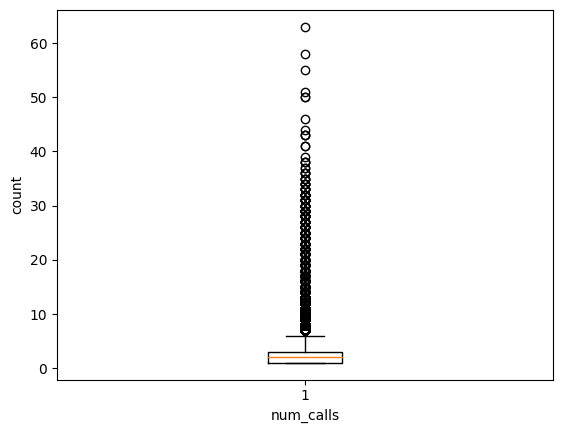

In [28]:
# Create a box plot
plt.boxplot(df['num_calls'])

# Adding labels and title
plt.xlabel('num_calls')
plt.ylabel('count')


# Show the plot
plt.show()

**Treating the outliers using the Clipping technique.**


In [29]:
df['age'] = df.age.clip(18,70)

df.age.describe()

count    45205.000000
mean        40.863666
std         10.380009
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.000000
Name: age, dtype: float64

In [30]:
df['dur'] = df.dur.clip(lower_bound_dur,upper_bound_dur)

df.dur.describe()

count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64

In [31]:
df['num_calls'] = df.num_calls.clip(lower_bound_call,upper_bound_call)
df.num_calls.describe()

count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

In [32]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,643,3,unknown,yes
45207,70,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,70,retired,married,secondary,cellular,17,nov,643,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


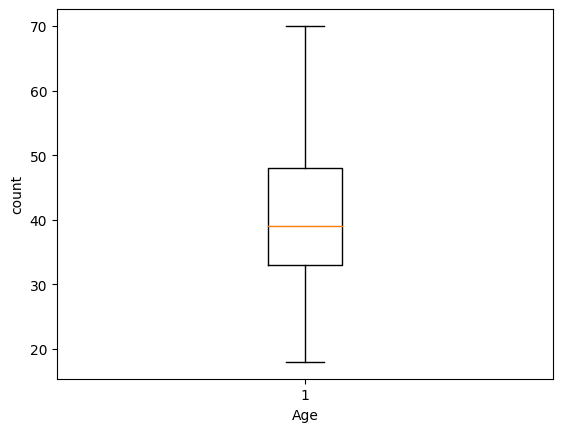

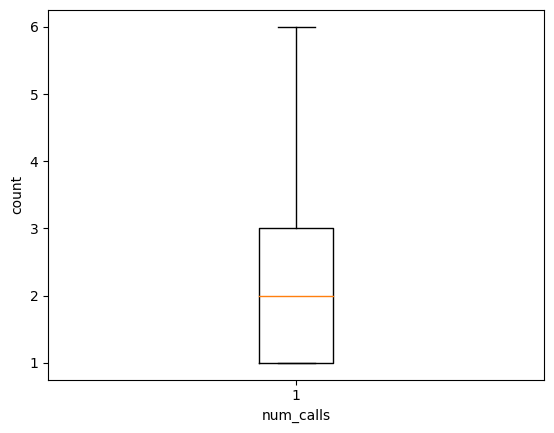

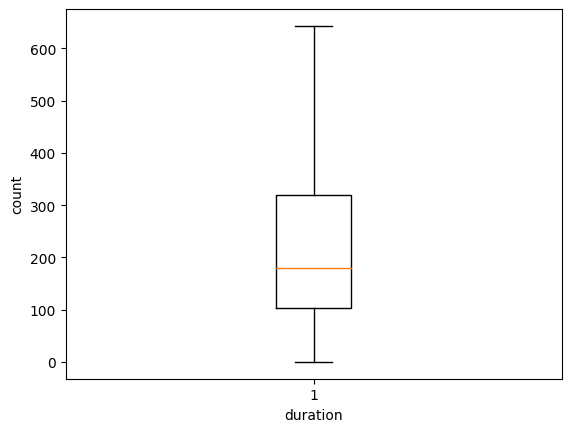

In [33]:
# Create a box plot to check outliers ahter clipping

plt.boxplot(df['age'])
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

plt.boxplot(df['num_calls'])
plt.xlabel('num_calls')
plt.ylabel('count')
plt.show()

plt.boxplot(df['dur'])
plt.xlabel('duration')
plt.ylabel('count')
plt.show()




Here we can clearly see that there are no outliers after clipping.

In [34]:
#changing the type of age into int
df['age']=df['age'].astype(int)

df.age.dtype

dtype('int64')

# **Exploratory Data Analysis**

### **1.Distribution of Features**

**Plots for continous value**

<ipython-input-35-57fc7b1cd64c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['age'])
<ipython-input-35-57fc7b1cd64c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['dur'])
<ipython-input-35-57fc7b1cd64c>:14: UserWarning: 

`distplot` is a deprecated function and will be removed i

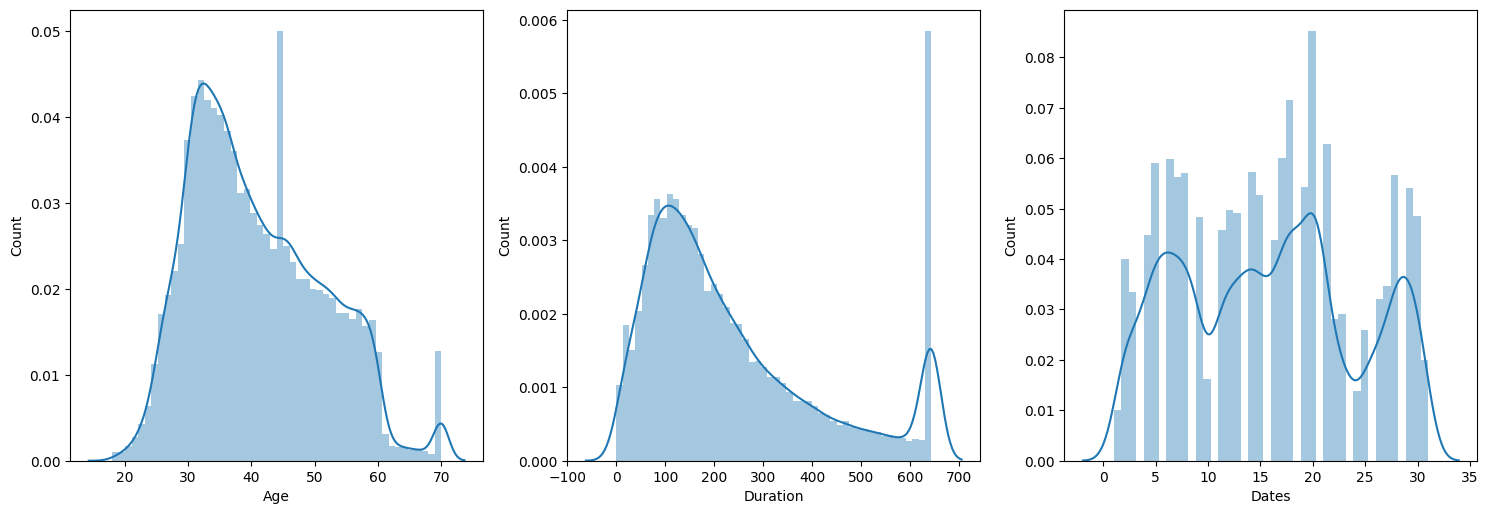

In [35]:
plt.figure(figsize=(15,15))

plt.subplot(331)
sns.distplot(x=df['age'])
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(332)
sns.distplot(x=df['dur'])
plt.xlabel('Duration')
plt.ylabel('Count')

plt.subplot(333)
sns.distplot(x=df['day'])
plt.xlabel('Dates')
plt.ylabel('Count')



plt.tight_layout()

**Plots for categorical columns**

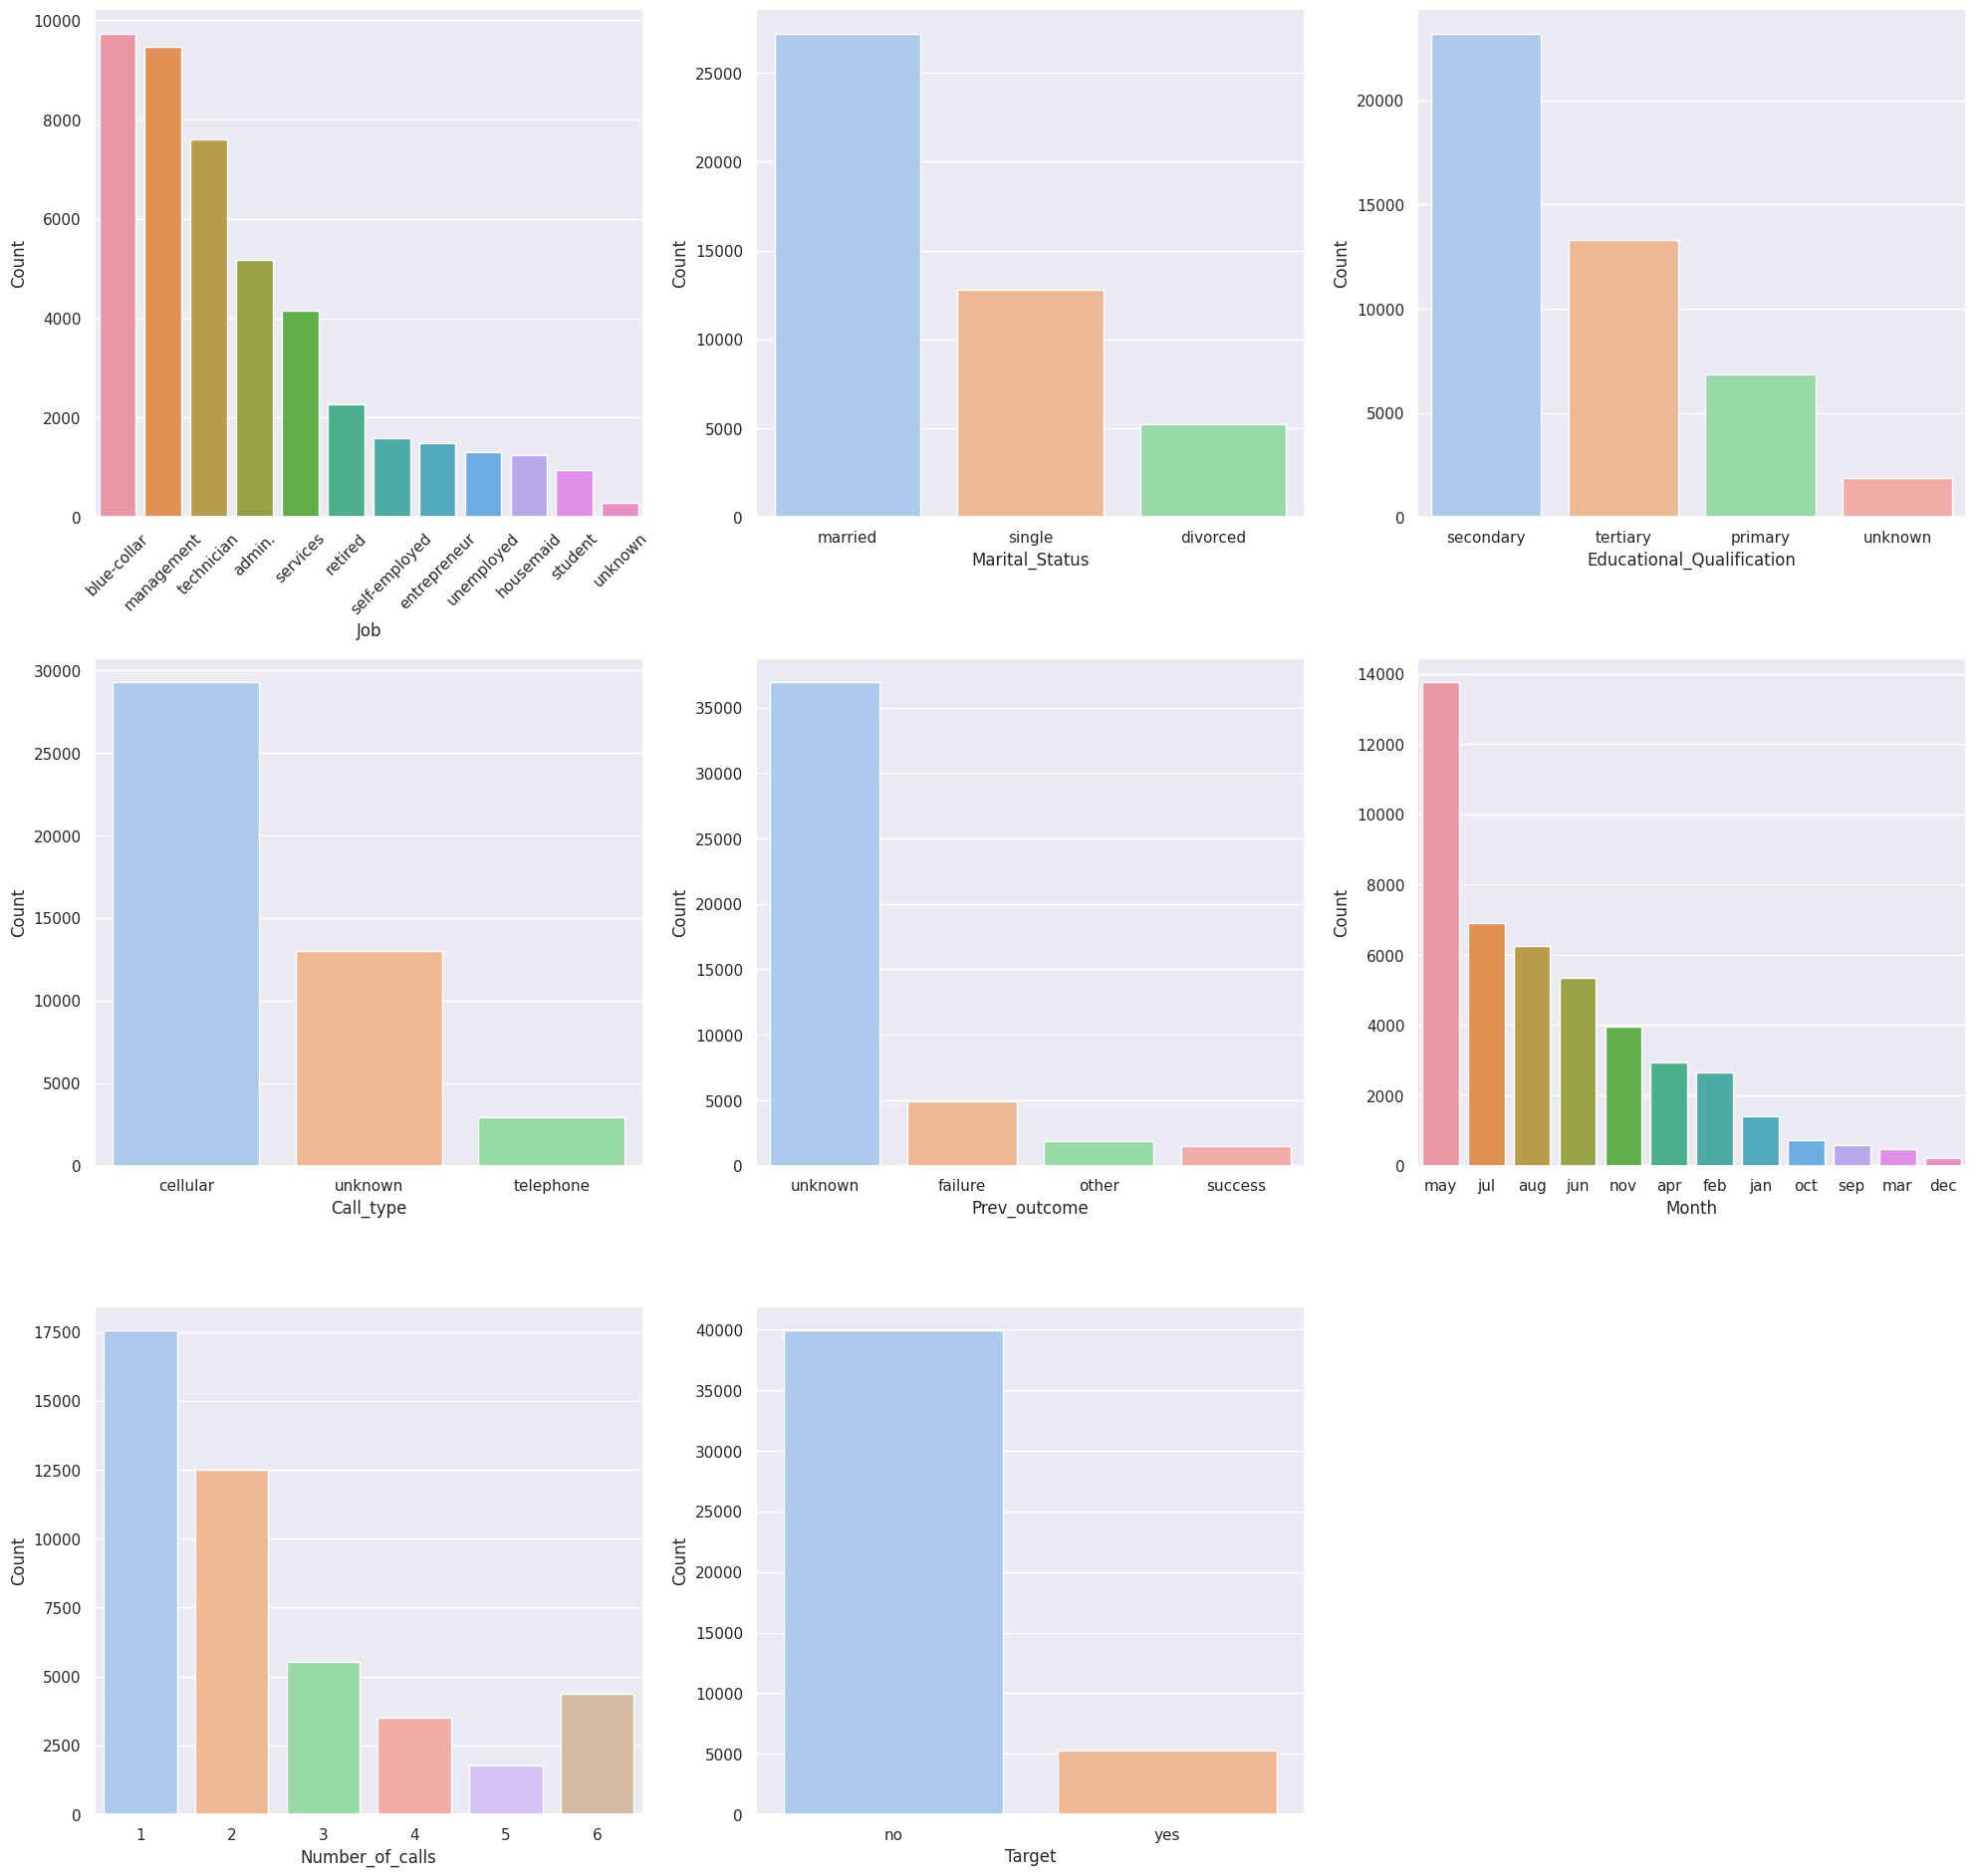

In [36]:

#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Job')
plt.ylabel('Count')

plt.subplot(432)
sns.countplot(data=df, x='marital', order=df['marital'].value_counts().index)
#plt.xticks(rotation=15)
plt.xlabel('Marital_Status')
plt.ylabel('Count')

plt.subplot(433)
sns.countplot(data =df,x='education_qual',order=df['education_qual'].value_counts().index)
#plt.xticks(rotation=15)
plt.xlabel('Educational_Qualification')
plt.ylabel('Count')

plt.subplot(434)
sns.countplot(data = df,x = 'call_type',order=df['call_type'].value_counts().index)
#plt.xticks(rotation=15)
plt.xlabel('Call_type')
plt.ylabel('Count')

plt.subplot(435)
sns.countplot(data = df,x = 'prev_outcome',order=df['prev_outcome'].value_counts().index)
#plt.xticks(rotation=15)
plt.xlabel('Prev_outcome')
plt.ylabel('Count')

""" plt.subplot(435)
    sns.countplot(data = df,x = 'day',order=df['day'].value_counts().index)
    plt.xticks(rotation=15)
    plt.xlabel('Day')
    plt.ylabel('Count')"""

plt.subplot(436)
sns.countplot(data = df,x = 'mon',order=df['mon'].value_counts().index)
#plt.xticks(rotation=15)
plt.xlabel('Month')
plt.ylabel('Count')

plt.subplot(437)
sns.countplot(x=df['num_calls'])
plt.xlabel('Number_of_calls')
plt.ylabel('Count')

plt.subplot(438)
sns.countplot(data = df,x = 'y',order=df['y'].value_counts().index)
#plt.xticks(rotation=15)
plt.xlabel('Target')
plt.ylabel('Count')


plt.tight_layout()

1.According to the 'Job' column, the highest number of jobs is occupied by blue-collar workers.

2.According to the 'Marital status' column, the highest number of people are married.

3.According to the 'Education Qualification' column,secondary has the highest number.

4.According to the 'Month' column, May has the highest number.


5.According to the 'Call type' column, the 'cellular' type has the highest number.

6.According to the 'Number_of_calls' column, One has the highest number.

7.According to the 'y' column, the highest number of customers are not ready to take the insurance.

8.According to the 'Previous outcome' column, 'unknown' has the highest number, followed by 'failure,' which also has a high count.

Here, we can understand that the dataset is imbalanced.

## **Feature vs Target plot**

"\nplt.subplot(334)\nsns.lineplot(df['n_bathroom'],df['sales_price'])\nplt.title('Number of Bathrooms vs Sales_Price')\nplt.subplot(335)\nsns.lineplot(df['n_room'],df['sales_price'])\nplt.title('Number of Rooms vs Sales_Price')\nplt.subplot(336)\nsns.lineplot(df['house_age'],df['sales_price'])\nplt.title('House Age vs Sales_Price')"

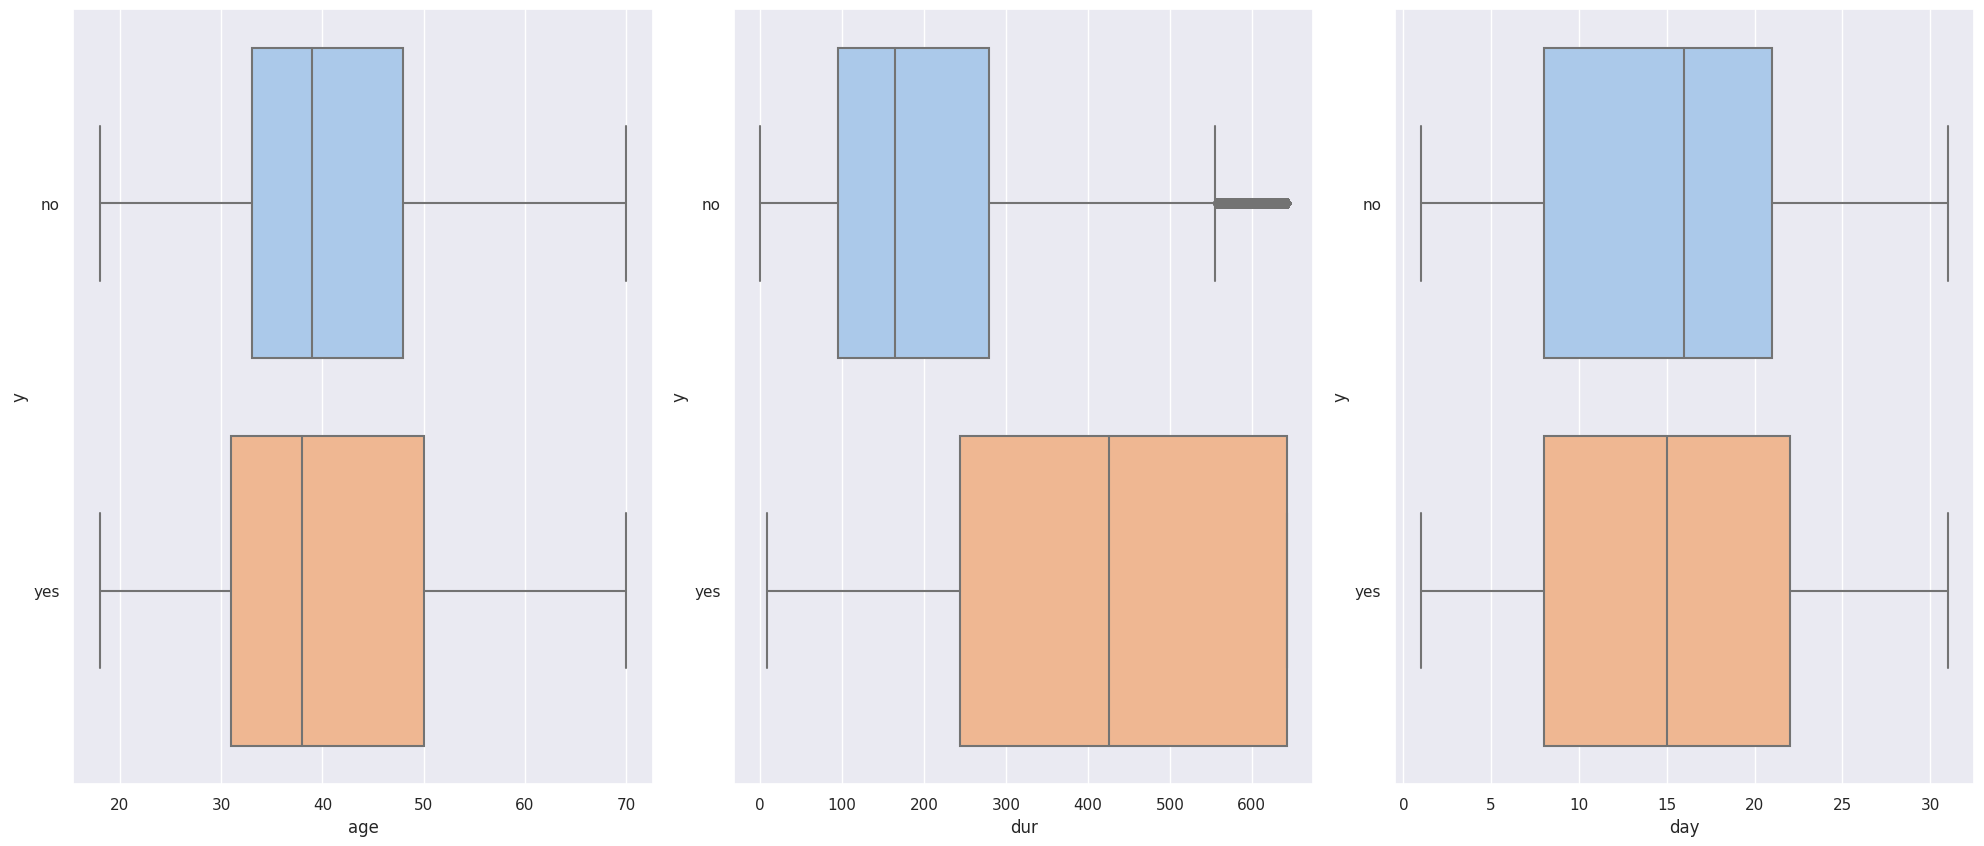

In [37]:
plt.figure(figsize=(20,25))
plt.subplot(331)
sns.boxplot(x=df['age'], y=df['y'], data=df)

plt.subplot(332)
sns.boxplot(x=df['dur'], y=df['y'], data=df)

plt.subplot(333)
sns.boxplot(x=df['day'], y=df['y'], data=df)

plt.tight_layout()

"""
plt.subplot(334)
sns.lineplot(df['n_bathroom'],df['sales_price'])
plt.title('Number of Bathrooms vs Sales_Price')
plt.subplot(335)
sns.lineplot(df['n_room'],df['sales_price'])
plt.title('Number of Rooms vs Sales_Price')
plt.subplot(336)
sns.lineplot(df['house_age'],df['sales_price'])
plt.title('House Age vs Sales_Price')"""


In [38]:
df.y = df['y'].map({'no':0,'yes':1})
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,643,3,unknown,1
45207,70,retired,divorced,primary,cellular,17,nov,456,2,unknown,1
45208,70,retired,married,secondary,cellular,17,nov,643,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,0


In [39]:
Job = df.groupby('job')['y'].mean().reset_index()
Job_sorted = Job.sort_values(by='y', ascending=False)

Marital = df.groupby('marital')['y'].mean().reset_index()
Marital_sorted = Marital.sort_values(by='y', ascending=False)

Education_qual = df.groupby('education_qual')['y'].mean().reset_index()
Education_qual_sorted = Education_qual.sort_values(by='y', ascending=False)

Call_type = df.groupby('call_type')['y'].mean().reset_index()
Call_type_sorted = Call_type.sort_values(by='y', ascending=False)

Months = df.groupby('mon')['y'].mean().reset_index()
Months_sorted = Months.sort_values(by='y', ascending=False)

Number_calls = df.groupby('num_calls')['y'].mean().reset_index()
Number_calls_sorted = Number_calls.sort_values(by='y', ascending=False)

Previous_outcome = df.groupby('prev_outcome')['y'].mean().reset_index()
Previous_outcome_sorted = Previous_outcome.sort_values(by='y', ascending=False)

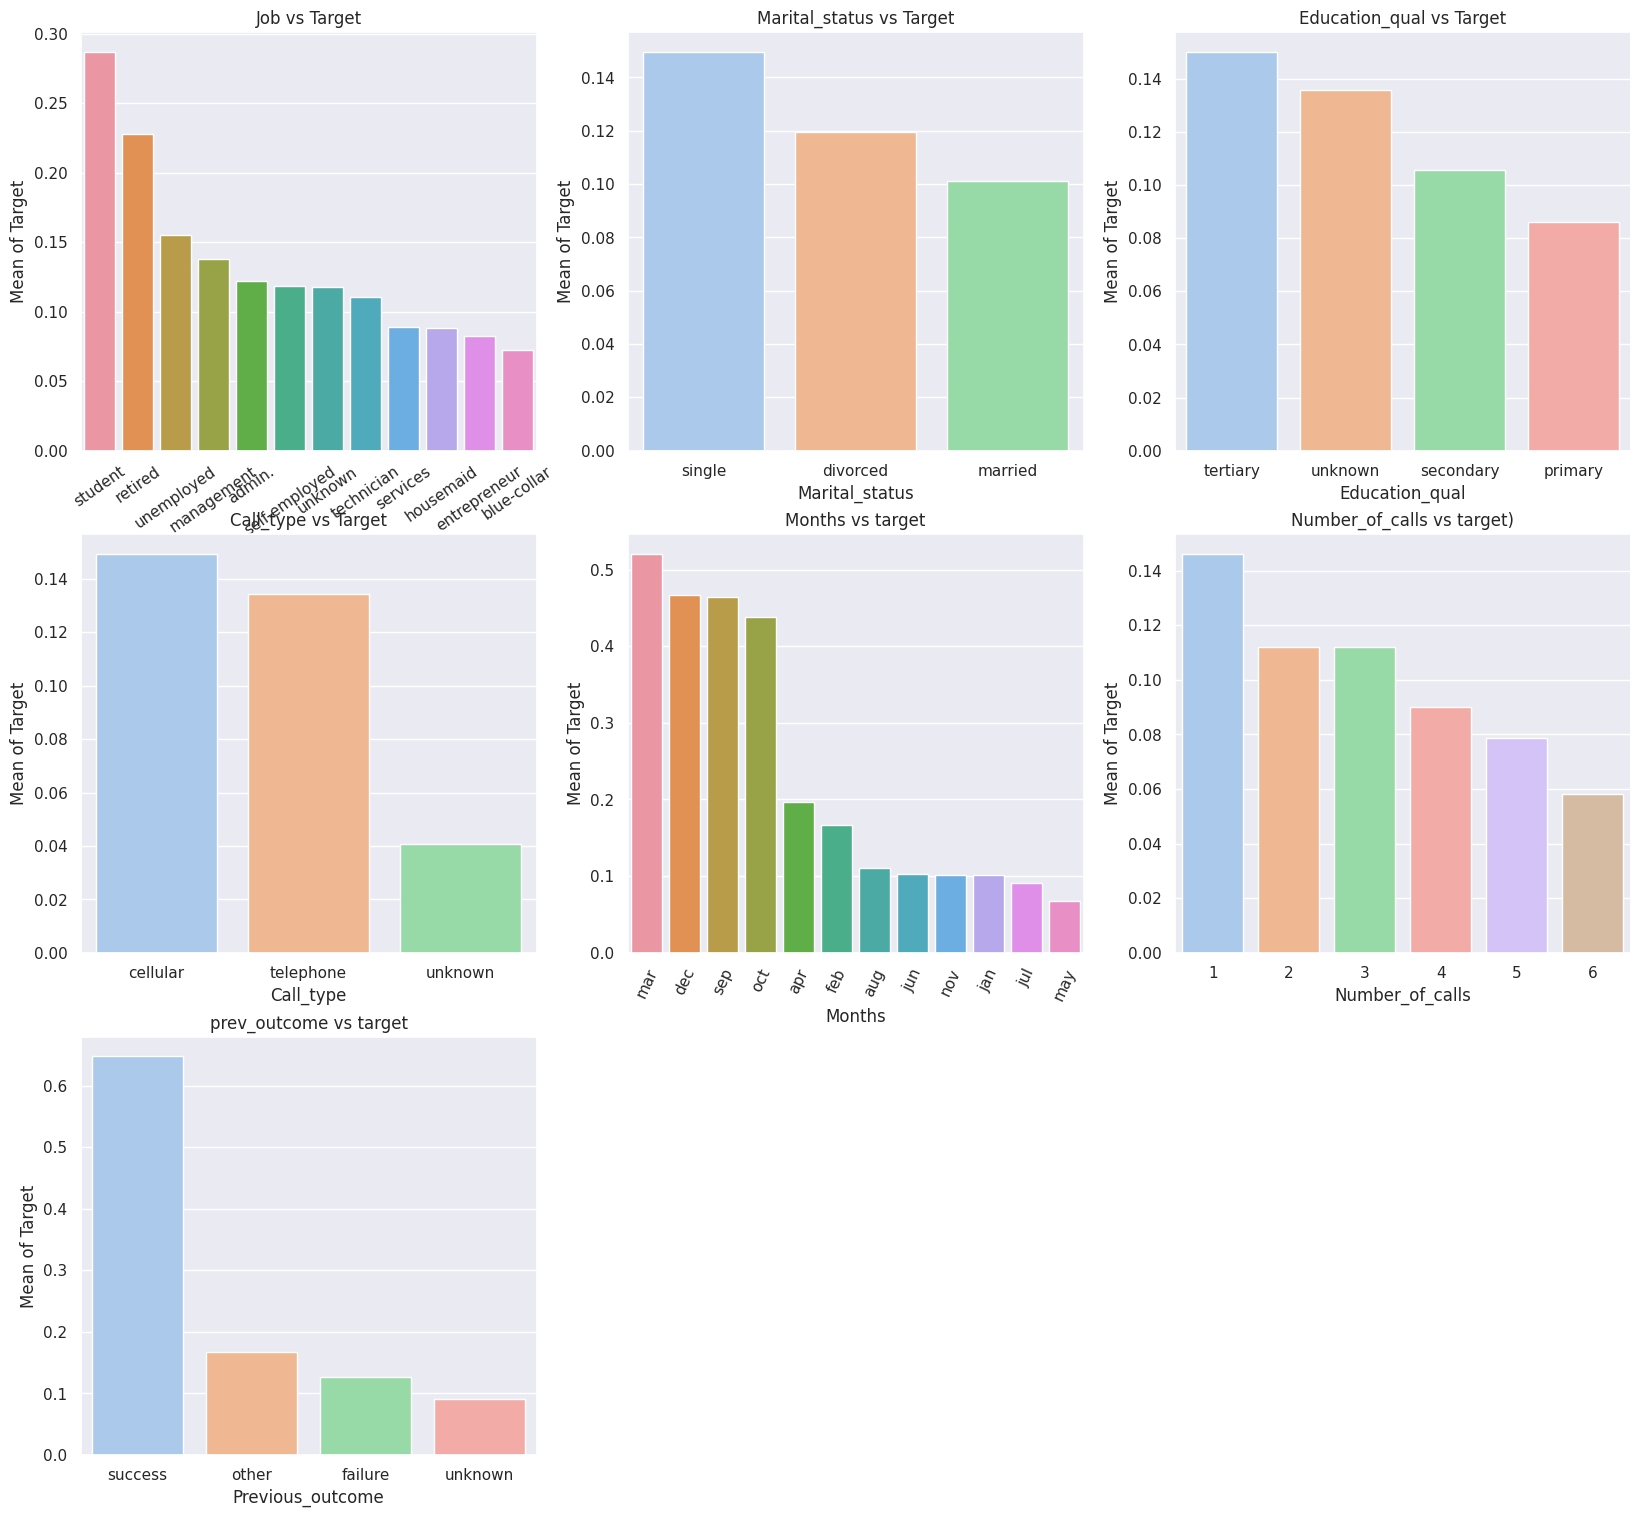

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(x='job', y='y', data=Job_sorted)
plt.xlabel('Job')
plt.ylabel('Mean of Target')
plt.title('Job vs Target')
plt.xticks(rotation=35)

plt.subplot(432)
sns.barplot(x='marital', y='y', data=Marital_sorted)
plt.xlabel('Marital_status')
plt.ylabel('Mean of Target')
plt.title('Marital_status vs Target')


plt.subplot(433)
sns.barplot(x='education_qual', y='y', data=Education_qual_sorted)
plt.xlabel('Education_qual')
plt.ylabel('Mean of Target')
plt.title('Education_qual vs Target')


plt.subplot(434)
sns.barplot(x='call_type', y='y', data=Call_type_sorted)
plt.xlabel('Call_type')
plt.ylabel('Mean of Target')
plt.title('Call_type vs Target')


plt.subplot(435)
sns.barplot(x='mon', y='y', data=Months_sorted)
plt.xlabel('Months')
plt.ylabel('Mean of Target')
plt.title('Months vs target')
plt.xticks(rotation=65)

plt.subplot(436)
sns.barplot(x='num_calls', y='y', data=Number_calls_sorted)
plt.xlabel('Number_of_calls')
plt.ylabel('Mean of Target')
plt.title('Number_of_calls vs target)')


plt.subplot(437)
sns.barplot(x='prev_outcome', y='y', data=Previous_outcome_sorted)
plt.xlabel('Previous_outcome')
plt.ylabel('Mean of Target')
plt.title('prev_outcome vs target')

plt.show()




In [41]:
df.corr()

<ipython-input-41-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,day,dur,num_calls,y
age,1.000000,-0.008876,-0.014568,0.025945,0.018440
day,-0.008876,1.000000,-0.039335,0.153025,-0.028371
dur,-0.014568,-0.039335,1.000000,-0.100056,0.390642
num_calls,0.025945,0.153025,-0.100056,1.000000,-0.084067
y,0.018440,-0.028371,0.390642,-0.084067,1.000000


The relationship between the target and features is not linear, except for the duration's correlation with the baseline value.

In [42]:
"""import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='day', hue='y', data=df, s=200)
plt.title("Customer Conversion data", y=1.015, fontsize=20)
plt.xlabel("AGE", labelpad=13)
plt.ylabel("DAY", labelpad=13)
ax = plt.gca()"""

'import seaborn as sns\nplt.figure(figsize=(10, 8))\nsns.scatterplot(x=\'age\', y=\'day\', hue=\'y\', data=df, s=200)\nplt.title("Customer Conversion data", y=1.015, fontsize=20)\nplt.xlabel("AGE", labelpad=13)\nplt.ylabel("DAY", labelpad=13)\nax = plt.gca()'

# **Encoding**

In [43]:

df['job']=df['job'].map({'blue-collar':0,'entrepreneur': 1,'housemaid': 2,'services': 3,'technician': 4,'unknown': 5,'self-employed': 6,'admin.': 7,'management': 8,'unemployed': 9,'retired': 10,'student': 11})
df['marital'] = df['marital'].map({'married':0,'divorced':1,'single':2})
df['education_qual'] = df['education_qual'].map({'primary':1,'secondary':2,'unknown':0,'tertiary':3})
df['call_type'] = df['call_type'].map({'unknown':0,'telephone':2,'cellular':3})
df['mon'] = df['mon'].map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':9,'sep':10,'dec':11,'mar':12})
df['prev_outcome'] = df['prev_outcome'].map({'unknown':0,'failure':1,'other':2,'success':5})


In [44]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,8,0,3,0,5,0,261,1,0,0
1,44,4,2,2,0,5,0,151,1,0,0
2,33,1,0,2,0,5,0,76,1,0,0
3,47,0,0,0,0,5,0,92,1,0,0
4,33,5,2,0,0,5,0,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,4,0,3,3,17,3,643,3,0,1
45207,70,10,1,1,3,17,3,456,2,0,1
45208,70,10,0,2,3,17,3,643,5,5,1
45209,57,0,0,2,2,17,3,508,4,0,0


# Balancing the Target data

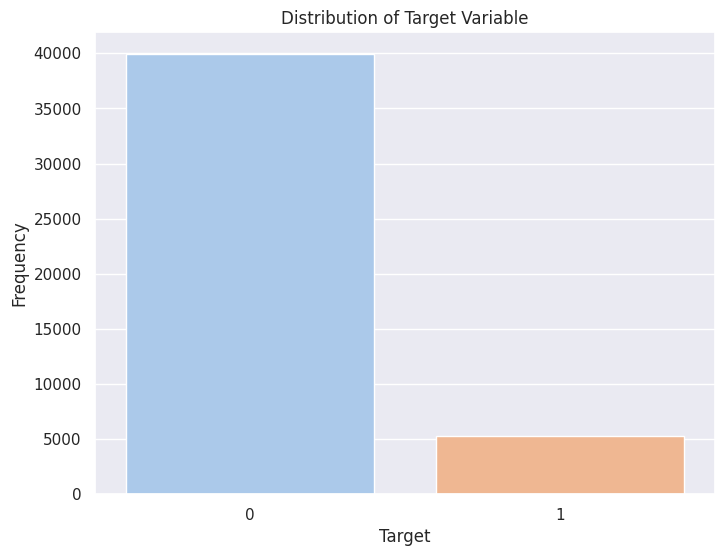

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y' is the column you want to plot
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df, order=df['y'].value_counts().index)
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()


From this visualization of data clearly we can say that the target variable has imbalance

In [46]:
# finding the percentage of target column
percentage = df['y'].value_counts(normalize=True)*100
print(percentage)


0    88.299967
1    11.700033
Name: y, dtype: float64


# Data Preprocessing

**Spliting the data**

In [47]:
x = df.drop('y',axis =1)
y = df['y']

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [49]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(36164, 10) (9041, 10) (36164,) (9041,)


**Balancing the data**

In [50]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)
x_train_smt.shape, y_train_smt.shape

((54324, 10), (54324,))

In [51]:
import collections, numpy
counter = collections.Counter(y_train_smt)
counter

Counter({0: 24060, 1: 30264})

**Scaling**

In [52]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train_scale = scale.fit_transform(x_train_smt)
x_test_scale = scale.transform(x_test)

x_train_scale.shape

(54324, 10)

# **Modelling**

### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
lr.fit(x_train_scale,y_train_smt)
y_pred_lr = lr.predict(x_test_scale)

#lr.predict_proba(x_test_scale)

In [54]:
cross_val_lr=cross_val_score(lr,x_train_scale,y_train_smt,cv=10).mean()
cross_val_lr

0.8887787282593935

In [55]:
lr.coef_


array([[-0.18947816,  0.58308149, -0.08395485, -0.2878168 ,  0.58236514,
        -0.05566252,  1.17580162,  2.76309447, -0.74938611,  0.86236541]])

In [56]:
lr.intercept_

array([0.632458])

In [57]:
"""from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,roc_auc_score

confusion_matrix(y_test,y_pred_lr)
f1_score(y_test,y_pred_lr) # f1 score
roc_auc_score(y_test,y_pred_lr)
#logistic_regression.score(X_test,y_test) # accuracy
# # logistic_regression.score(X_test,y_test)
# plot_roc_curve(logistic_regression, X_test, y_test) #AUROC
# accuracy_score(y_test,y_pred) #accuracy"""

'from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,roc_auc_score\n\nconfusion_matrix(y_test,y_pred_lr)\nf1_score(y_test,y_pred_lr) # f1 score\nroc_auc_score(y_test,y_pred_lr)\n#logistic_regression.score(X_test,y_test) # accuracy\n# # logistic_regression.score(X_test,y_test)\n# plot_roc_curve(logistic_regression, X_test, y_test) #AUROC\n# accuracy_score(y_test,y_pred) #accuracy'

### K-nearnest neighbor(KNN)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = np.arange(1,30)
cross_val_knn =[]

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train_scale,y_train_smt)
  print("K value :", k,
        "Training Score : ", knn.score(x_train_scale,y_train_smt),
        "Cross Value Accuracy :" ,(cross_val_score(knn,x_train_scale,y_train_smt,cv=10)).mean())
  cross_val_knn.append(cross_val_score(knn,x_train_scale,y_train_smt,cv = 10).mean())

K value : 1 Training Score :  1.0 Cross Value Accuracy : 0.9479056389700535
K value : 2 Training Score :  0.9838377144540167 Cross Value Accuracy : 0.9398062710371654
K value : 3 Training Score :  0.9701789264413518 Cross Value Accuracy : 0.9414811797592144
K value : 4 Training Score :  0.9660555187394153 Cross Value Accuracy : 0.9403768276937399
K value : 5 Training Score :  0.9586186584198513 Cross Value Accuracy : 0.9400637488624988
K value : 6 Training Score :  0.9569803401811354 Cross Value Accuracy : 0.9384070801437894
K value : 7 Training Score :  0.9532066858110596 Cross Value Accuracy : 0.9372104369820929
K value : 8 Training Score :  0.9518628966939107 Cross Value Accuracy : 0.9365110346768114
K value : 9 Training Score :  0.9490832781091231 Cross Value Accuracy : 0.9354248582342078
K value : 10 Training Score :  0.9475185921507989 Cross Value Accuracy : 0.9334184849744119
K value : 11 Training Score :  0.9457882335615934 Cross Value Accuracy : 0.9334183629903657
K value : 12

In [59]:
cross_val_knn_classifier = 0.9414811797592144
print("The best K-Value is 3 and Cross_val_score is",cross_val_knn_classifier )

The best K-Value is 3 and Cross_val_score is 0.9416004283044883


### Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

max_depth = np.arange(1,30)
cross_val_dt = []
for d in max_depth:
  dt = DecisionTreeClassifier(max_depth=d,random_state=0)
  dt.fit(x_train_scale,y_train_smt)
  print('Depth : ',d,
        'Train Score : ',dt.score(x_train_scale,y_train_smt),
        'Cross Value Accuracy : ',cross_val_score(dt,x_train_scale,y_train_smt,cv=10).mean())
  cross_val_dt.append(cross_val_score(dt,x_train_scale,y_train_smt,cv = 10).mean())


Depth :  1 Train Score :  0.7812569030262867 Cross Value Accuracy :  0.7785142587151502
Depth :  2 Train Score :  0.8004933362786245 Cross Value Accuracy :  0.8050768099653919
Depth :  3 Train Score :  0.864608644429718 Cross Value Accuracy :  0.8666519269277615
Depth :  4 Train Score :  0.8679589131875414 Cross Value Accuracy :  0.8685665139697484
Depth :  5 Train Score :  0.878985347176202 Cross Value Accuracy :  0.8760955014452397
Depth :  6 Train Score :  0.8964730137692364 Cross Value Accuracy :  0.8959762173126805
Depth :  7 Train Score :  0.9082909947721081 Cross Value Accuracy :  0.9068921562089745
Depth :  8 Train Score :  0.9213239084014432 Cross Value Accuracy :  0.9153599227380159
Depth :  9 Train Score :  0.9332523378249025 Cross Value Accuracy :  0.9243985339415188
Depth :  10 Train Score :  0.9420145791915175 Cross Value Accuracy :  0.9298841226107731
Depth :  11 Train Score :  0.9525808114277299 Cross Value Accuracy :  0.9361427885607156
Depth :  12 Train Score :  0.960

**Implementing the Decision Tree**

In [61]:
dt = DecisionTreeClassifier(max_depth=23,random_state=0)
dt.fit(x_train_scale,y_train_smt)

DecisionTreeClassifier(max_depth=23, random_state=0)

In [62]:
cross_val_dt_score = max(cross_val_dt)
cross_val_dt_score
print("The best Depth is 23 and Cross_val_score is ",cross_val_dt_score )

The best Depth is 23 and Cross_val_score is  0.9549190642630931


In [63]:
ftImp = list(zip(dt.feature_importances_, df.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
7,0.473917,dur
6,0.155880,mon
4,0.094148,call_type
5,0.074069,day
9,0.063965,prev_outcome
0,0.054216,age
1,0.039853,job
8,0.026247,num_calls
3,0.009684,education_qual
2,0.008022,marital


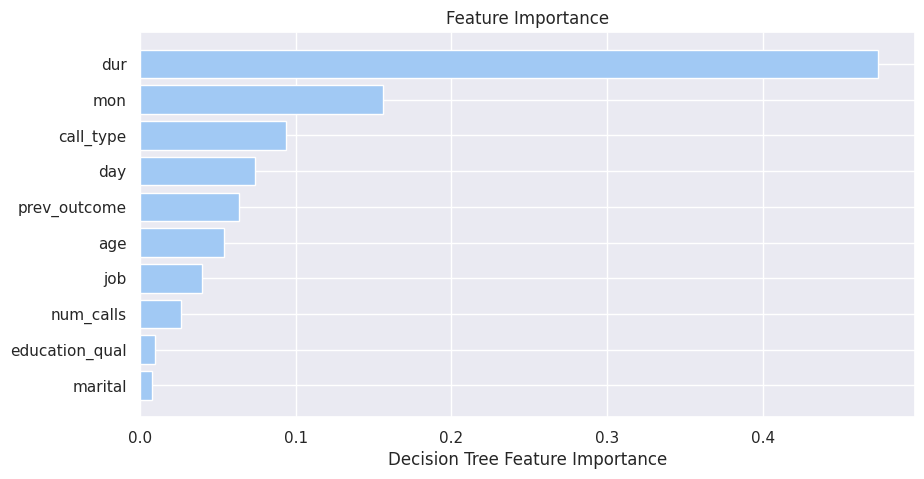

### Random Forest

In [64]:
"""from sklearn.ensemble import RandomForestClassifier

max_depth = np.arange(1,30)
cross_val_rf = []

for d in max_depth:
  rfc = RandomForestClassifier(max_depth=d,random_state=0)
  rfc.fit(x_train_scale,y_train_smt)
  print('Depth : ',d,
        'Training Score : ',rfc.score(x_train_scale,y_train_smt),
        'Cross Validation Accuracy : ',cross_val_score(rfc,x_train_scale,y_train_smt,cv=10).mean())
  cross_val_rf.append(cross_val_score(rfc,x_train_scale,y_train_smt,cv=10).mean())"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

max_depth = np.arange(1, 30)
cross_val_rf = []

for d in max_depth:
    rfc = RandomForestClassifier(n_estimators = 100,max_depth=d,max_features='sqrt')
    rfc.fit(x_train_scale, y_train_smt)
    train_score = rfc.score(x_train_scale, y_train_smt)
    cross_val_acc = cross_val_score(rfc, x_train_scale, y_train_smt, cv=10).mean()

    print('Depth:', d,
          'Training Score:', train_score,
          'Cross Validation Accuracy:', cross_val_acc)

    cross_val_rf.append(cross_val_acc)


Depth: 1 Training Score: 0.8181098593623445 Cross Validation Accuracy: 0.8227305647563151
Depth: 2 Training Score: 0.8702046977394889 Cross Validation Accuracy: 0.8665600559988095
Depth: 3 Training Score: 0.8809181945364848 Cross Validation Accuracy: 0.8795929263620265
Depth: 4 Training Score: 0.8936749871143509 Cross Validation Accuracy: 0.8905090550112809
Depth: 5 Training Score: 0.9085302996833812 Cross Validation Accuracy: 0.9016091694865311
Depth: 6 Training Score: 0.9102606582725867 Cross Validation Accuracy: 0.9111077520319155
Depth: 7 Training Score: 0.9210109712097784 Cross Validation Accuracy: 0.9175873277009232
Depth: 8 Training Score: 0.928576688020028 Cross Validation Accuracy: 0.9254476678954526
Depth: 9 Training Score: 0.9396767542890804 Cross Validation Accuracy: 0.9333262209857557
Depth: 10 Training Score: 0.944812605846403 Cross Validation Accuracy: 0.9383884674114198
Depth: 11 Training Score: 0.9529121566894927 Cross Validation Accuracy: 0.9441133616715826
Depth: 12 

**Implementing Random Forest**

In [95]:
rfc = RandomForestClassifier(n_estimators = 100,max_depth=22,max_features='sqrt')
rfc.fit(x_train_scale,y_train_smt)

RandomForestClassifier(max_depth=22)

In [96]:
cross_val_rf_score1 = cross_val_score(rfc, x_train_scale, y_train_smt, cv=10).mean()
print("The best Depth is 22 and Cross_val_score is ",cross_val_rf_score1 )

The best Depth is 22 and Cross_val_score is  0.9702712139066151


In [98]:
cross_val_rf_score = 0.9703816162452389

### XGBoost

In [67]:
import xgboost as xgb

cross_val_xgb =[]
for lrt in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,0.89,0.9,1]:
  xgbc = xgb.XGBClassifier(learning_rate = lrt,n_estimators=100)
  xgbc.fit(x_train_scale,y_train_smt)
  print('Learning Rate : ',lrt,
         'Cross Validation Score : ',cross_val_score(xgbc,x_train_scale,y_train_smt,cv=10).mean())
  cross_val_xgb.append(np.mean(cross_val_score(xgbc,x_train_scale,y_train_smt,cv=10)))

Learning Rate :  0.01 Cross Validation Score :  0.9155256143455407
Learning Rate :  0.02 Cross Validation Score :  0.9243983374116664
Learning Rate :  0.03 Cross Validation Score :  0.9309332497878156
Learning Rate :  0.04 Cross Validation Score :  0.9349646666433541
Learning Rate :  0.05 Cross Validation Score :  0.9392721469490299
Learning Rate :  0.1 Cross Validation Score :  0.9505011002960959
Learning Rate :  0.11 Cross Validation Score :  0.9519737696350263
Learning Rate :  0.12 Cross Validation Score :  0.9530966700524017
Learning Rate :  0.13 Cross Validation Score :  0.9541643862426934
Learning Rate :  0.14 Cross Validation Score :  0.9550111689948
Learning Rate :  0.15 Cross Validation Score :  0.9562260623251732
Learning Rate :  0.2 Cross Validation Score :  0.9604966831182484
Learning Rate :  0.5 Cross Validation Score :  0.9696822986511003
Learning Rate :  0.7 Cross Validation Score :  0.9711550222051624
Learning Rate :  0.89 Cross Validation Score :  0.9723699595853301
Le

In [82]:
cross_val_xgbc=max(cross_val_xgb)
print("The best Learning rate is 0.89 and Cross_val_score is:",cross_val_xgbc)

The best Learning rate is 0.89 and Cross_val_score is: 0.9723699595853301


**Implementing the Extreme Gradient Boosting Classifier**

In [93]:
  xgbc= xgb.XGBClassifier(learning_rate =0.89,n_estimators=100) # initialise the model
  xgbc.fit(x_train_scale,y_train_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.89, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [94]:
cross_val_xgbc = cross_val_score(xgbc,x_train_scale,y_train_smt,cv=10).mean()
cross_val_xgbc

0.9723699595853301

# **Feature Importance**

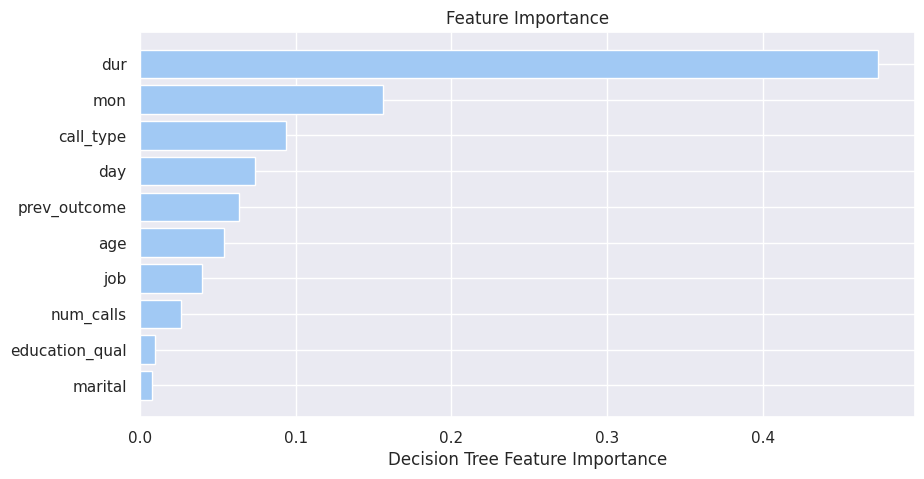

In [110]:
sorted_idx = dt.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], dt.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")
plt.title("Feature Importance")
plt.show()

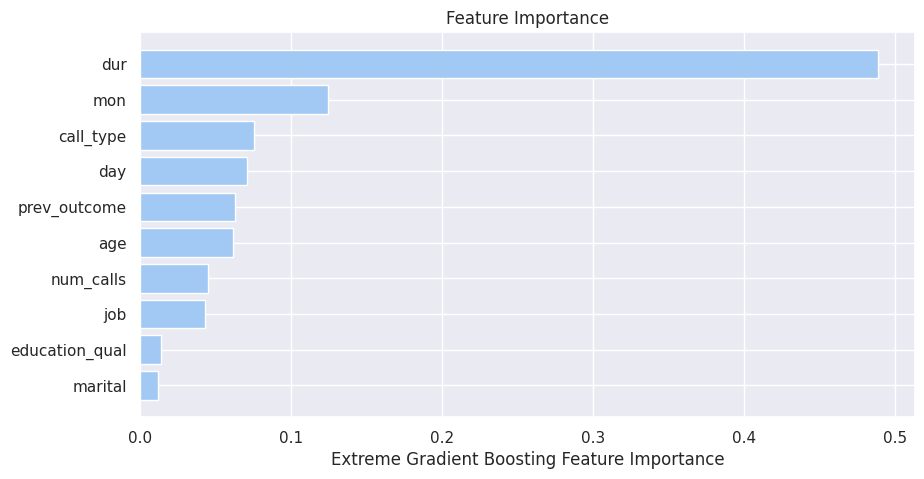

In [108]:
sorted_idx = rfc.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rfc.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

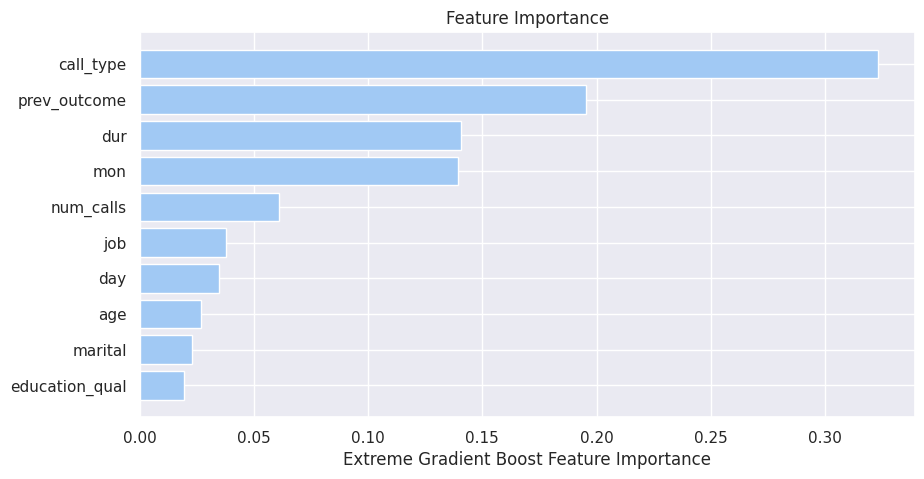

In [111]:
sorted_idx = xgbc.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgbc.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boost Feature Importance")
plt.title("Feature Importance")
plt.show()

# **Model Evaluation**

**Cross Validation Score for Machine Learning Models**

In [99]:
print('Cross Val Score for Logistic Regression Model ',cross_val_lr)
print('Cross Val Score for KNN Model ',cross_val_knn_classifier)
print('Cross Val Score for DecisionTree  Model ',cross_val_dt_score)
print('Cross Val Score for RandomForeset  Model ',cross_val_rf_score)
print('Cross Val Score for XGBoot Model ',cross_val_xgbc)

Cross Val Score for Logistic Regression Model  0.8887787282593935
Cross Val Score for KNN Model  0.9416004283044883
Cross Val Score for DecisionTree  Model  0.9549190642630931
Cross Val Score for RandomForeset  Model  0.9703816162452389
Cross Val Score for XGBoot Model  0.9723699595853301


**The cross-validation scores of all models performed well; however, XGBoost achieved a higher score compared to the other models.**

**F1-Score for Machine Learning Models**

In [72]:
from sklearn.metrics import confusion_matrix, f1_score,roc_auc_score

In [100]:
y_pred_lr = lr.predict(x_test_scale)
y_pred_knn = knn.predict(x_test_scale)
y_pred_dt = dt.predict(x_test_scale)
y_pred_rf = rfc.predict(x_test_scale)
y_pred_xgb = xgbc.predict(x_test_scale)


In [101]:
f1_val_lr = f1_score(y_test,y_pred_lr)
f1_val_knn =f1_score(y_test,y_pred_knn)
f1_val_dt = f1_score(y_test,y_pred_dt)
f1_val_rf = f1_score(y_test,y_pred_rf)
f1_val_xgb = f1_score(y_test,y_pred_xgb)

In [102]:
print('F1 Score for Logistic Regression Model ',f1_val_lr)
print('F1 Score for KNN Model ',f1_val_knn)
print('F1 Score for DecisionTree  Model ',f1_val_dt)
print('F1 Score for RandomForeset  Model ',f1_val_rf)
print('F1 Score for XGBoot Model ',f1_val_xgb)

F1 Score for Logistic Regression Model  0.45813427206437013
F1 Score for KNN Model  0.4956140350877193
F1 Score for DecisionTree  Model  0.5216284987277353
F1 Score for RandomForeset  Model  0.5535714285714286
F1 Score for XGBoot Model  0.5731186329280316


**"The F1 scores of all models were reasonable; however, XGBoost outperformed the other models."**

**AUROC Score for Machine Learning Models**

In [104]:
auroc_lr = roc_auc_score(y_test,y_pred_lr)
auroc_knn = roc_auc_score(y_test,y_pred_knn)
auroc_dt = roc_auc_score(y_test,y_pred_dt)
auroc_rf = roc_auc_score(y_test,y_pred_rf)
auroc_xgb = roc_auc_score(y_test,y_pred_xgb)

print('AUROC Score for Logistic Regression Model ',auroc_lr)
print('AUROC Score for KNN Model ',auroc_knn)
print('AUROC Score for DecisionTree  Model ',auroc_dt)
print('AUROC Score for RandomForeset  Model ',auroc_rf)
print('AUROC Score for XGBoot Model ',auroc_xgb)

AUROC Score for Logistic Regression Model  0.804762045149345
AUROC Score for KNN Model  0.8216217733003995
AUROC Score for DecisionTree  Model  0.8082301308048979
AUROC Score for RandomForeset  Model  0.8439988969944876
AUROC Score for XGBoot Model  0.8423876635771619


**The AUROC scores of all models indicate good performance. Random Forest performed better than the other models.**